# Computer Vision Features Notebook

This notebook contains exercises for the computer vision features material.

In [40]:
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/lemur_img.png -P ../data

--2025-03-13 14:36:55--  https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/lemur_img.png
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/lemur_img.png [following]
--2025-03-13 14:36:56--  https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/lemur_img.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1421701 (1.4M) [image/png]
Saving to: ‘../data/lemur_img.png.1’

lemur_img.png.1     100%[===================>]   1.36M  5.38MB/s    in 0.3s    

2025-03-13 14:36:56 (5.38 MB/s) - ‘../data/lemur_img.png.1’ saved [1421701/14217

### Exercise 1 - Derive the min-max normalization.

Derive the min-max normalization from the following constraints:

i.) $f(x) := kx + d$

ii.) $f(max) = 1$

iii.) $f(min) = 0$


*Notice:* Put your derivation in the next cell (you can either use latex notation inside markdown or a foto).

GL1 := 1 = k * max + d \
GL2 := 0 = k * min + d \

(k * max + d) - (k * min + d) = 1 - 0 \
k * ((max + d) - (min + d)) = 1 \
k * (max - min) = 1 \
k = 1 / (max - min)

Einsetzen \
0 = 1 / (max - min) * min + d \
-(1 / (max - min) * min = d
d = -min / (max - min)

f(x) = 1 / (max - min) * x - min / (max - min) \
f(x) = x / (max - min) - min / (max - min) \
f(x) = (x -min) / (max - min)


### Exercise 2 - Implement the min-max normalization.

Use the formula you derived in the previous exercise and implement the min-max normalization for a given numpy array.  

[]

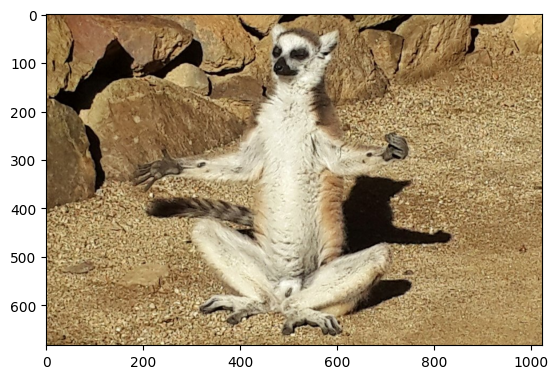

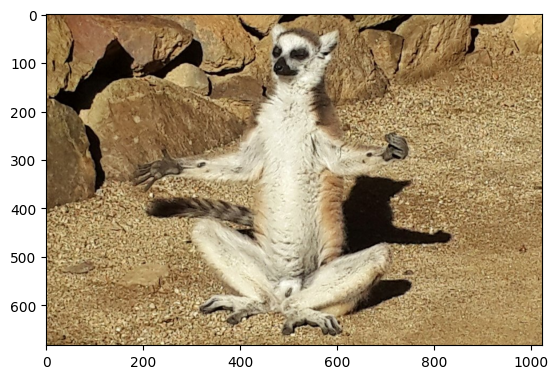

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def normalize(img):
    max = np.max(img)
    min = np.min(img)
    return (img - min) / (max - min)

img = cv2.imread("../data/lemur_img.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = normalize(img)

fig1, ax1 = plt.subplots()
ax1.imshow(img)
ax1.plot()

fig1, ax1 = plt.subplots()
ax1.imshow(img)
ax1.plot()

### Exercise 3 - Histograms:

Implement a function to compute a histogram (using a user supplied number of bins) for a given image. Notice that histograms are usually computed for each color channel separately.

* Make sure your implementation can deal with normalized data (i.e. in a range of 0 and 1).
* Plot your histograms of each color channel using matplotlibs ```bar()``` function.


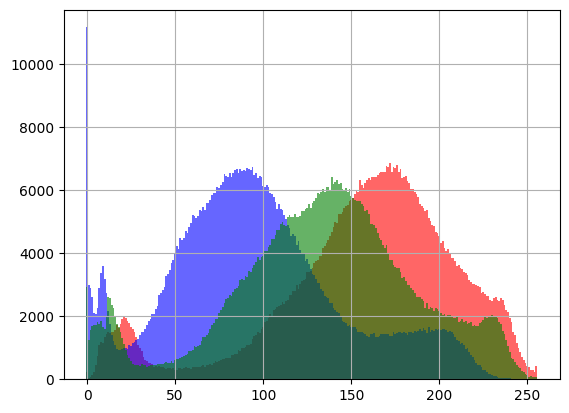

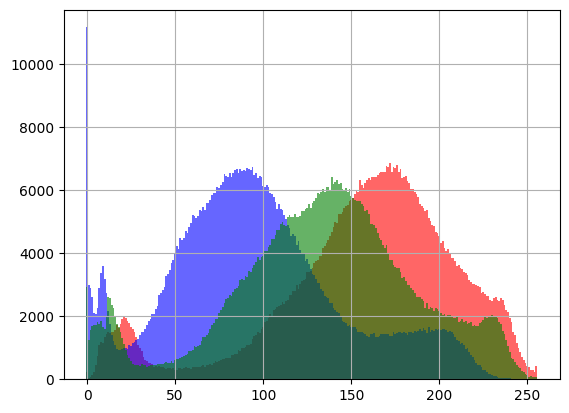

In [46]:
img = cv2.imread('../data/lemur_img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def hist(img):
  if img.max() <= 1.0:
    img = (img * 255).astype(np.uint8)

  red_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
  green_hist = cv2.calcHist([img], [1], None, [256], [0, 256])
  blue_hist = cv2.calcHist([img], [2], None, [256], [0, 256])

  plt.bar(np.arange(256), red_hist.flatten(), width=1.0, color='red', alpha=0.6, label='Red')
  plt.bar(np.arange(256), blue_hist.flatten(), width=1.0, color='blue', alpha=0.6, label='Blue')
  plt.bar(np.arange(256), green_hist.flatten(), width=1.0, color='green', alpha=0.6, label='Green')

  plt.grid()
  plt.show()

hist(img)

hist(normalize(img))

### Exercise 4 - Scale Invariant Feature Transform:

* Compute the SIFT descriptors for the provided images (sift1_img.png and sift2_img.png). See https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html for a tutorial how to use openCV to compute SIFT descriptors.

* Use an openCV feature matcher (https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html) to match your descriptors and visualize the matches as shown in the slides.




In [ ]:
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/sift1_img.png -P ../data
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/sift2_img.png -P ../data

### Exercise 5 -  Local Binary Patterns:

It is now time to develop the full computer vision pipeline to classify some images.

1. Implement Local Binary Patterns (to do so use a simple 8-neighborhood).
2. Write a method to compute grayscale histograms (not lbp-histograms) for all image data (X_train and X_test). Re-use your implementation from before.
3. Write a method to compute lbp histograms for all image data (X_train and X_test).
4. Train two separate Neural Networks and classify the data using:
    * The grayscale histograms as features
    * The lbp-histograms as features
    
Notice: You will need to one-hot-encode the labels of the dataset to train a neural network (why?). Use the ```tf.keras.utils.to_categorical(Y)``` method to encode your labels accordingly.

Compare and interpret your results, what would you expect? Can you explain the results?



    





In [ ]:
import pickle, bz2
from sklearn.model_selection import train_test_split

!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/kth_tips.pbz2 -P ../data


with bz2.BZ2File('../data/kth_tips.pbz2', 'rb') as fd:
    kth_dataset = pickle.load(fd)

X_train, X_test, Y_train, Y_test = train_test_split(kth_dataset['X'], kth_dataset['Y'], random_state=12345)
